In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import pandas as pd 
from pathlib import Path 
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


In [13]:
analysis_dir = Path(Path.home(), "Documents/xray/score_bench/data")
job_names = ["34_1", "35_2", "36_4", "37_8", "38_16", "39_32"]

score_dfs = list() 
for job_name in job_names: 
    score_dir = Path(analysis_dir, job_name)
    
    score_file = Path(score_dir, "rand_5000_3ca7.csv")
    score_df = pd.read_csv(score_file)
    score_dfs.append(score_df)
    print(np.mean(score_df["r_free"]), np.min(score_df["r_free"]))


0.3471511381526184 0.3279630114987032
0.33493593955510675 0.3098401681154453
0.33527800377373357 0.30220786084505474
0.42523478615287347 0.3280590521691894
0.4263575295878708 0.3797875064251835
0.4777782855636887 0.38937299943919695


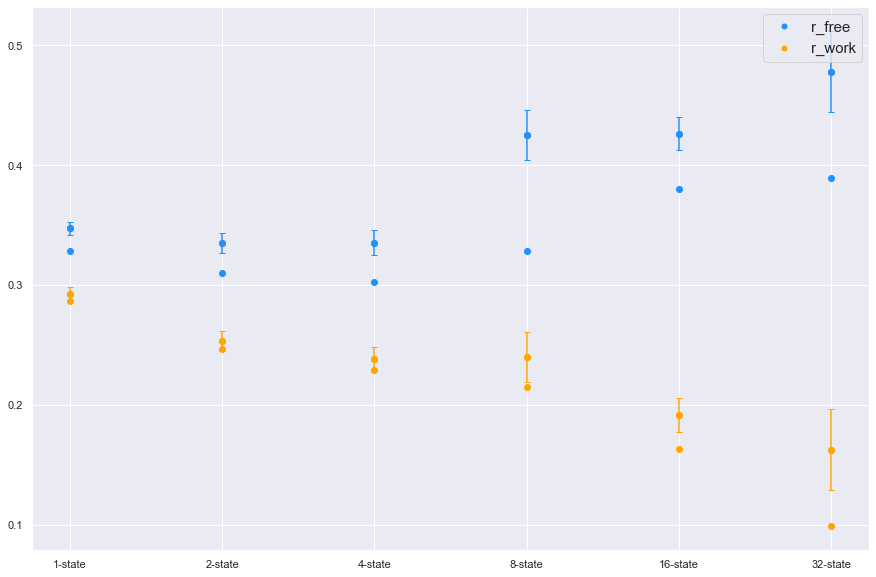

In [33]:
fig_file = Path(Path.home(), "Documents/xray/score_bench/figures/34-39_rand_5000.png")

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

fig = plt.figure(figsize=(15,10))

for i in range(len(score_dfs)): 
    n_state = 2**i
    score_df = score_dfs[i]
    x = i

    y = np.mean(score_df["r_free"])
    std = np.std(score_df["r_free"])
    
    min_val = np.min(score_df["r_free"])

    plt.scatter(x, np.mean(score_df["r_free"]))
    plt.errorbar(x, np.mean(score_df["r_free"]), np.std(score_df["r_free"]), linestyle='None', marker='o', capsize=3, c=colors[0])
    plt.scatter(x, np.min(score_df["r_free"]), c=colors[0])
    
    plt.scatter(x, np.mean(score_df["r_work"]), c=colors[1])
    plt.errorbar(x, np.mean(score_df["r_work"]), np.std(score_df["r_free"]), linestyle='None', marker='o', capsize=3, c=colors[1])
    plt.scatter(x, np.min(score_df["r_work"]), c=colors[1])
    
my_xticks = ["1-state",'2-state','4-state','8-state', '16-state', '32-state']
plt.xticks(list(range(len(score_dfs))), my_xticks)

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))
plt.legend(custom_legend, ['r_free', 'r_work'], loc="upper right", fontsize=15)

# plt.show()
plt.savefig(fig_file)
